In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configurations of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Honey\Desktop\DA-Portfolio\Data\movies.csv')


In [2]:
# Let's look the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# Let's see if there is missing data
# pct_missing = percentege missing si hay nulls

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
# We find that several columns have undefined or null values

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Change data type of columns
# The DataFrame.fillna() method fills the NA/NaN values in the DataFrame.
df['budget'] = df['budget'].fillna(value=0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].fillna(value=0)
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].fillna(value=0)
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].fillna(value=0)
df['runtime'] = df['runtime'].astype('int64')

In [48]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000      1155    1778   
7445   535       5      0  2019       183    8.4   903000       162     743   
3045  6896       5      6  1997       704    7.8  1100000      1155    1778   
6663  5144       5      0  2015       698    7.8   876000      1125    2550   
7244   536       5      0  2018       192    8.4   897000       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       55  237000000  2847246203       -1      162           94  
7445  2241       55  356000000  2797501328       -1      181           18  
3045  1595       55  200000000  2201647264       -1      194           96  
6663   524       55  245000000  2069521700       -1      138           94  
7244  2241       55  321000000  2048359754       -1      149           18

In [36]:
# The most grossing movies
pd.set_option('display.max_rows', None)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [37]:
# Drop any duplicates

df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)

df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

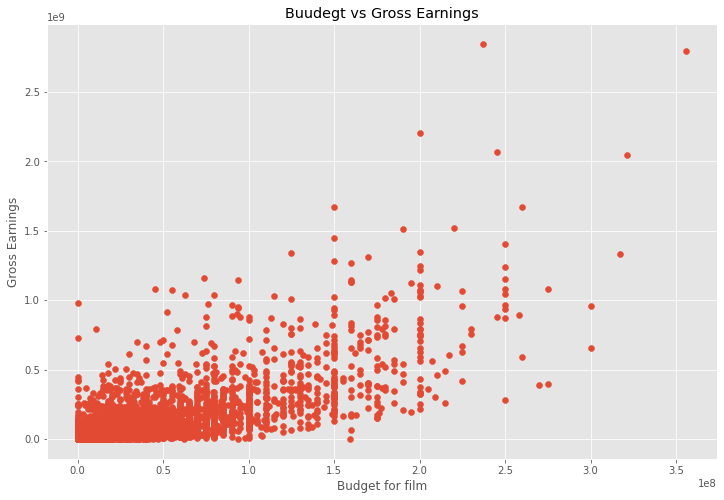

In [30]:
# Budget high correlation
# company high correlation

# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Buudegt vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

In [28]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross company  runtime yearcorrect  
5445  2847246203     NaN      162        18,   
7445  2797501328     NaN      181         201  
3045  2201647264     NaN      194        19,   
6663  2069521700     NaN      138        18,   
7244  2048359754     NaN      149         201

<Axes: xlabel='budget', ylabel='gross'>

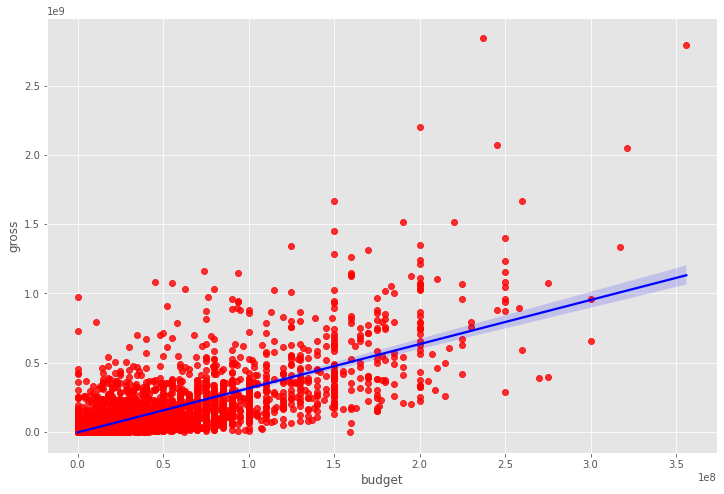

In [32]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [40]:
# Looks at Company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross company  runtime yearcorrect  
5445  2847246203     NaN      162        18,   
7445  2797501328     NaN      181         201  
3045  2201647264     NaN      194        19,   
6663  2069521700     NaN      138        18,   
7244  2048359754     NaN      149         201

In [52]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000      1155    1778   
7445   535       5      0  2019       183    8.4   903000       162     743   
3045  6896       5      6  1997       704    7.8  1100000      1155    1778   
6663  5144       5      0  2015       698    7.8   876000      1125    2550   
7244   536       5      0  2018       192    8.4   897000       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       55  237000000  2847246203       -1      162           94  
7445  2241       55  356000000  2797501328       -1      181           18  
3045  1595       55  200000000  2201647264       -1      194           96  
6663   524       55  245000000  2069521700       -1      138           94  
7244  2241       55  321000000  2048359754       -1      149           18

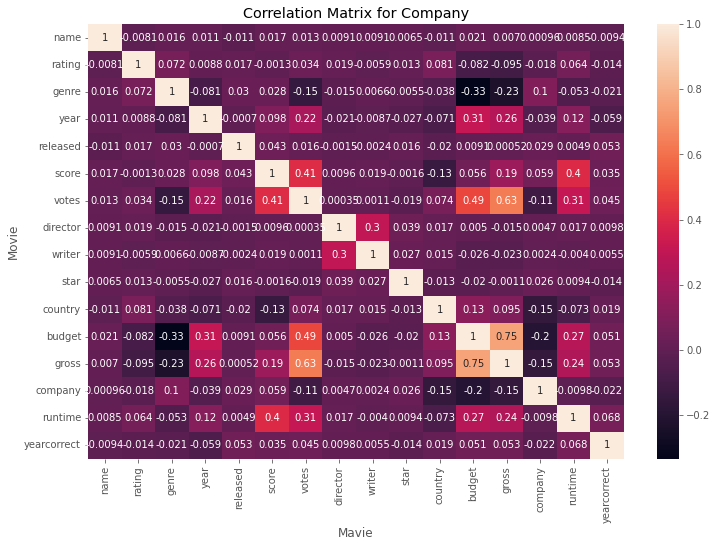

In [43]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Company')

plt.xlabel('Mavie')

plt.ylabel('Movie')

plt.show()

In [44]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company      0.000961 -0.018387  0.099779 -0.038516  0.028690  0.059243   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.398387   
yearcorrect -0.009364 -0.014175 -0.020681 -0.059373  0.052636  0.035345   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company     -0.109944  0.004740  0.002383  0.025543 -0.150228 -0.201700   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.044872  0.009791  0.005465 -0.013727  0.019367  0.050588   

                gross   company   runtime  yearcorrect  
name         0.006989  0.000961  0.008483    -0.009364  
rating      -0.095450 -0.018387  0.064133    -0.014175  
genre       -0.234297  0.099779 -0.052914    -0.020681  
year         0.261900 -0.038516  0.116358    -0.059373  
released     0.000519  0.028690  0.004852     0.052636  
score        0.186392  0.059243  0.398387     0.035345  
votes        0.632870 -0.109944  0.306984     0.044872  
director    -0.014916  0.004740  0.017062     0.009791  
writer      -0.022997  0.002383 -0.004036     0.005465  
star        -0.001129  0.025543  0.009418    -0.013727  
country      0.095325 -0.150228 -0.073319     0.019367  
budget       0.750157 -0.201700  0.268372     0.050588  
gross        1.000000 -0.149630  0.244339     0.053230  
company     -0.149630  1.000000 -0.009840    -0.022232  
runtime      0.244339 -0.009840  1.000000     0.068280  
yearcorrect  0.053230 -0.022232  0.068280     1.000000

In [51]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [50]:
sorted_pairs =corr_pairs.sort_values()

sorted_pairs.head()

budget  genre     -0.334021
genre   budget    -0.334021
gross   genre     -0.234297
genre   gross     -0.234297
budget  company   -0.201700
dtype: float64

In [49]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.head()

# Votes and Gross have the highest correlation to gross earnings

votes   gross     0.632870
gross   votes     0.632870
        budget    0.750157
budget  gross     0.750157
name    name      1.000000
dtype: float64